# **💡추천 시스템 구현 실습💡**

## 내용 기반 필터링 (Content-based Filtering)을 이용한 "🎬영화 추천 시스템"
이 실습에서는 간단하게 내용 기반 필터링 기법을 활용하여 사용자에게 유사한 영화를 추천하는 영화 추천 시스템을 구현해보도록 하겠습니다!
- **데이터셋** : TMDB에서 제공하는 `tmdb_5000_movies.csv`
- **주요 사용 기술**: 텍스트 전처리, TF-IDF, 코사인 유사도
- **실습 목표**: 특정 영화와 유사한 장르 및 키워드를 기반으로, 비슷한 영화 목록을 추천하는 알고리즘을 직접 구현해보는 것!

다음 코드를 따라오시면 쉽게 구현 가능합니다:D

### **1. 라이브러리 및 데이터셋 불러오기**

In [1]:
import pandas as pd

movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
movies_df.shape

(4803, 20)

### **2. 데이터 전처리**

In [ ]:
# 중요한 칼럼만 선택
selected_columns = ['id', 'title', 'genres', 'keywords']
movies_df = movies_df[selected_columns]

# 깜짝 전처리 복습! 데이터프레임의 결측 행을 버릴 때 어떻게 했었죠?
# 결측치 처리
movies_df = movies_df.***()

movies_df

,id,title,genres,keywords
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi..."
4799,72766,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[]
4800,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam..."
4801,126186,Shanghai Calling,[],[]


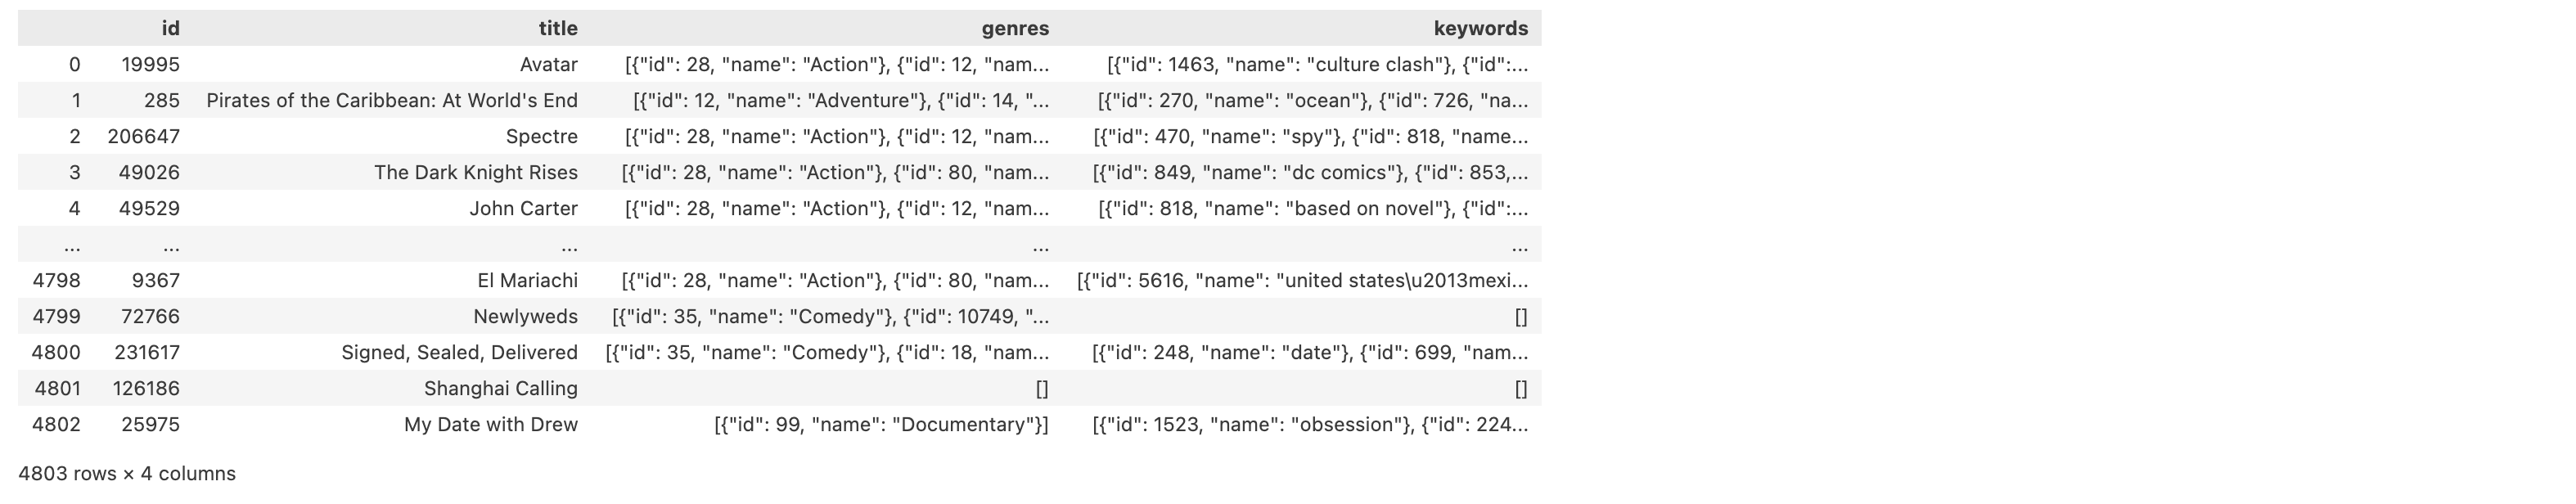

### **3. TF-IDF 변환**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF 변환을 위한 벡터화 객체 생성
tfidf_vectorizer = ***(stop_words='english', lowercase=True)

# 'genres'와 'keywords' 칼럼을 합친 새로운 칼럼 생성
movies_df['content'] = movies_df['genres'] + ' ' + movies_df['keywords']

# fit_transform 이용해서 TF-IDF 행렬 생성
tfidf_matrix = tfidf_vectorizer.***(movies_df['content'])

movies_df.head()

,id,title,genres,keywords,content
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


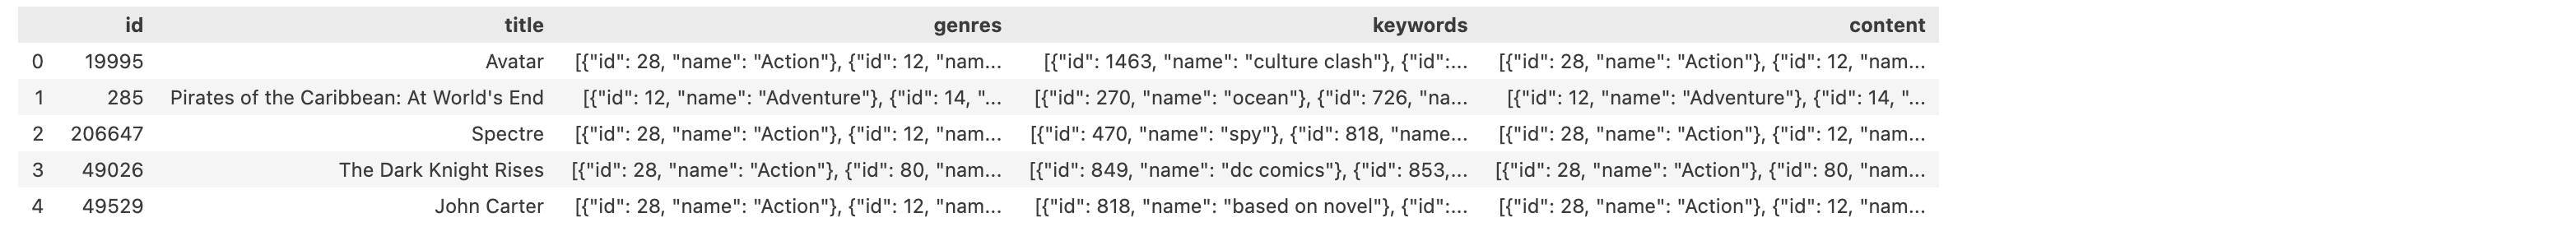

### **4. 유사도 측정**

In [ ]:
# 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = ***(tfidf_matrix, tfidf_matrix)

print(cosine_sim)

[[1.         0.2134779  0.17283162 ... 0.1663669  0.         0.10620453]
 [0.2134779  1.         0.16468193 ... 0.1523504  0.         0.09816652]
 [0.17283162 0.16468193 1.         ... 0.11756377 0.         0.08139758]
 ...
 [0.1663669  0.1523504  0.11756377 ... 1.         0.         0.08006883]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.10620453 0.09816652 0.08139758 ... 0.08006883 0.         1.        ]]


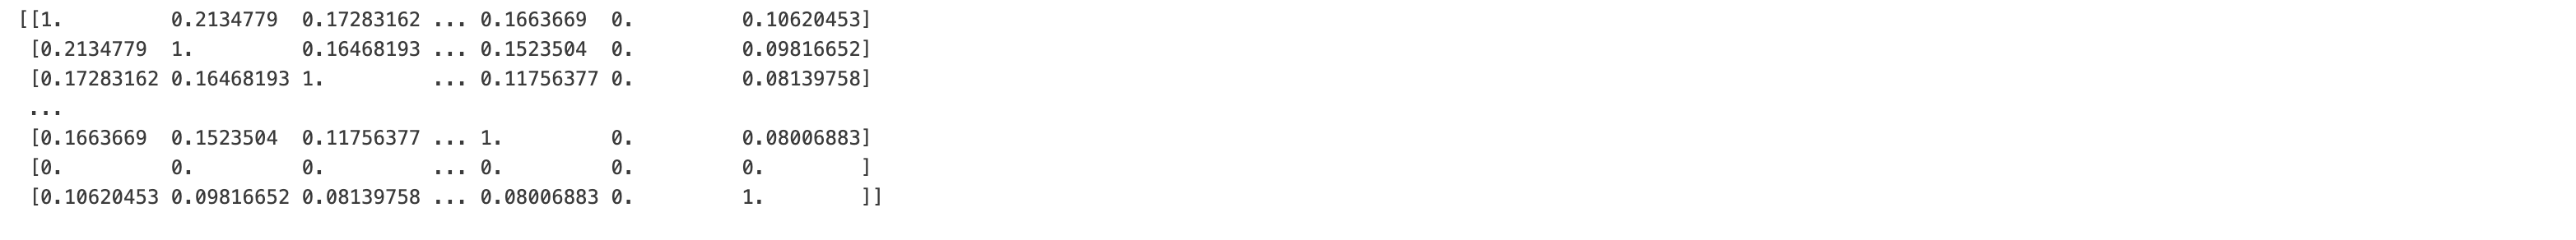


각 영화의 장르를 벡터 형태로 표현하면, 이 벡터들 간의 코사인 유사도를 계산하여 영화 간의 유사성을 판단할 수 있습니다. 각 영화의 특징을 잘 반영하고, 
유사한 장르를 가진 영화들끼리 묶을 수 있게 됩니다.

### **5. 콘텐츠 기반 필터링 함수 정의**

In [ ]:
# 콘텐츠 기반 필터링
def content_based_filtering(title, cosine_sim=cosine_sim):
    # 제목에 해당하는 인덱스 찾기
    idx = movies_df[movies_df['title'] == title].index[0]

    # 해당 영화에 대한 유사도 측정
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 정렬 (정렬하는 함수 복습!!)
    sim_scores = ***(sim_scores, key=lambda x: x[1], reverse=True)

    # 상위 10개 영화 선택
    sim_scores = sim_scores[1:11]

    # 선택된 영화의 인덱스
    movie_indices = [i[0] for i in sim_scores]

    # 선택된 영화의 제목으로 반환
    return movies_df['title'].iloc[movie_indices]

측정된 유사도를 기준으로 내림차순 정렬하여 유사도가 높은 상위 10편의 영화를 선택합니다. 이때 자기 자신(테스트하려는 영화)은 제외합니다. 선택된 영화들의 인덱스를 활용하여 해당 영화들의 제목을 리턴하는 콘텐츠 기반 필터링 함수가 완성되었습니다.

### **6. 테스트**
영화 '아바타'를 이용하여 알고리즘을 시험해봅시다.

In [7]:
result = content_based_filtering('Avatar')
print(result)

47      Star Trek Into Darkness
278          Planet of the Apes
838                      Alien³
2403                     Aliens
4332             Silent Running
541                     Soldier
1473       The Astronaut's Wife
3158                      Alien
3730                      Cargo
239                     Gravity
Name: title, dtype: object


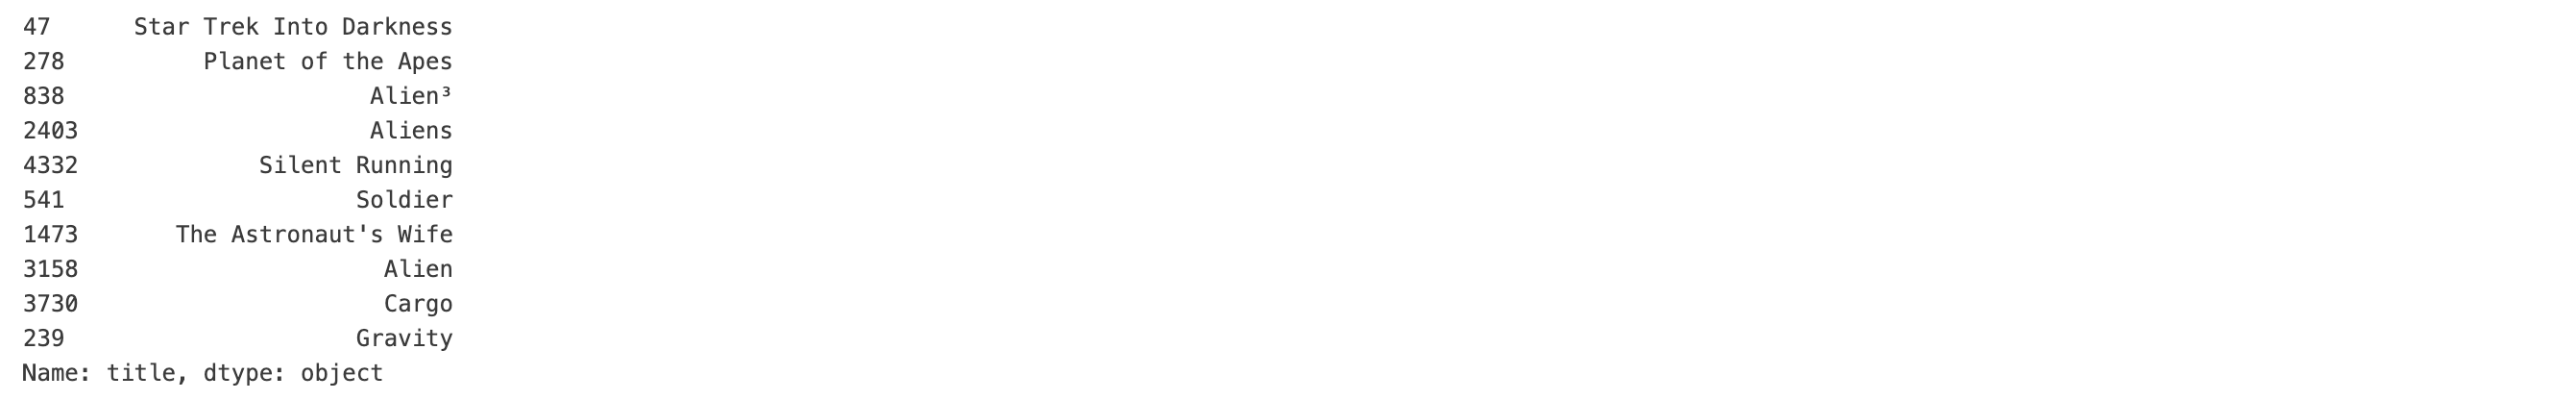

'아바타'와 비슷한 10개의 영화가 잘 추천된 것을 확인할 수 있습니다~!